In [156]:
import warnings
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [158]:
carDF = pd.read_csv('../data/auto-mpg.csv', header=None)
carDF.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

carDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [159]:
labels = ['USA','EU','KOR']

x = [carDF[carDF['origin'] == 1]['mpg'],
carDF[carDF['origin'] == 2]['mpg'],
carDF[carDF['origin'] == 3]['mpg']]

x

[0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      17.0
        ... 
 392    27.0
 393    27.0
 395    32.0
 396    28.0
 397    31.0
 Name: mpg, Length: 249, dtype: float64,
 19     26.0
 20     25.0
 21     24.0
 22     25.0
 23     26.0
        ... 
 354    34.5
 359    28.1
 360    30.7
 375    36.0
 394    44.0
 Name: mpg, Length: 70, dtype: float64,
 14     24.0
 18     27.0
 29     27.0
 31     25.0
 53     31.0
        ... 
 382    34.0
 383    38.0
 384    32.0
 385    38.0
 390    32.0
 Name: mpg, Length: 79, dtype: float64]

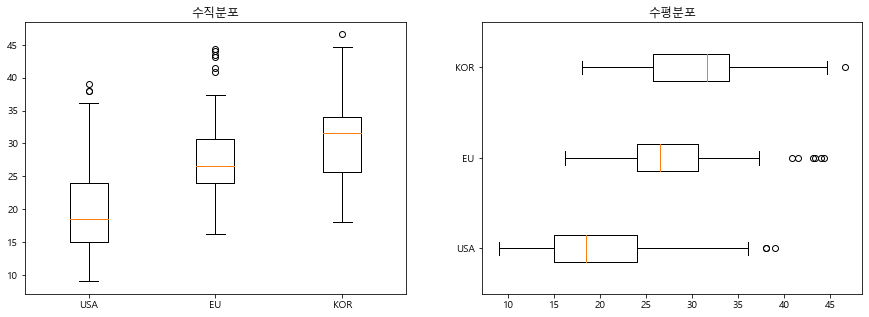

In [160]:
# 제조국가별 연비분포(수직, 수평)

fig = plt.figure(figsize=(15,5))

ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)

ax01.boxplot(x, labels=labels)
ax02.boxplot(x, labels=labels, vert=False)

ax01.set_title('수직분포')
ax02.set_title('수평분포')

plt.show()
plt.close()

### 문제01]
- 자동차 배기량(displ)에 따라 고속도로 연비(hwy)가 다른지를 알아보자
- 배기량이 4 이하인 자동차와 5이상인 자동차 중 어떤 자동차의 고속도로연비가 평균적으로 높은지 알아보자

In [161]:
xls = pd.ExcelFile('../data/car_mpg.xlsx')
carDF = xls.parse(xls.sheet_names[0])
carDF

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [162]:
displ_4 = carDF[carDF['displ'] <= 4]['hwy'].mean()
displ_5 = carDF[carDF['displ'] >= 5]['hwy'].mean()
print('배기량이 4 이하인 자동차의 고속도로 연비 평균은 {}이고, 5 이상인 자동차의 고속도로 연비 평균은 {}이다.'.format(displ_4, displ_5))

배기량이 4 이하인 자동차의 고속도로 연비 평균은 25.96319018404908이고, 5 이상인 자동차의 고속도로 연비 평균은 18.07894736842105이다.


In [163]:
displ = carDF.groupby(carDF.displ).agg(np.mean).loc[:, 'hwy']

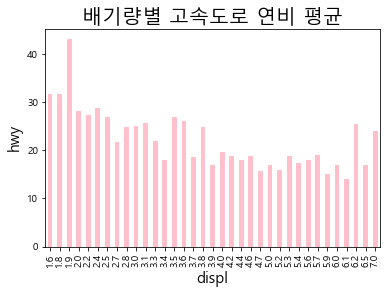

In [164]:
fig = plt.figure()

displ.plot(kind='bar', color='pink')
plt.title('배기량별 고속도로 연비 평균', size=20) 
plt.xlabel('displ', size=15)
plt.ylabel('hwy', size=15)

plt.show()
plt.close()

### 문제 02]
- 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 한다. 
- audi와 toyota 중 어느 manufacturer(자동차 제조 회사)의 cty(도시연비)가 평균적으로 더 높은지 알아보시오.

In [165]:
audi = carDF[carDF['manufacturer'] == 'audi']['cty'].mean()
toyota = carDF[carDF['manufacturer'] == 'toyota']['cty'].mean()
print('Audi의 도시연비는 {}이고, Toyota의 도시연비는{}이다.'.format(audi, toyota))

Audi의 도시연비는 17.61111111111111이고, Toyota의 도시연비는18.529411764705884이다.


In [166]:
manu = carDF.groupby(carDF.manufacturer).agg(np.mean).loc[:, 'cty']

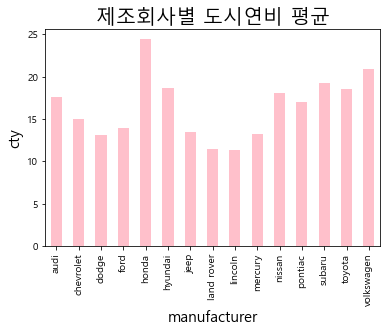

In [167]:
fig = plt.figure()

manu.plot(kind='bar', color='pink')
plt.title('제조회사별 도시연비 평균', size=20) 
plt.xlabel('manufacturer', size=15)
plt.ylabel('cty', size=15)

plt.show()
plt.close()

### 문제 03]
- chevrolet, ford, honda 자동차의 고속도로 연비 평균을 알아보려고 한다. 
- 이 회사들의 데이터를 추출한 후 hwy 전체 평균을 확인하시오.
- bar plot 이용한 시각화


- 데이터 전처리 : 연료가격 변수 추가(price_fl)
- c : 가스 2.35, d : 디젤 2.38, e : 에탄올 2.11 , p : 고급휘발유 2.76 , r : 보통휘발유 2.22

In [168]:
result = carDF.query("manufacturer == 'chevelot' or manufacturer == 'honda' or manufacturer == 'ford'")
result['hwy'].mean()

22.852941176470587

In [169]:
ex_03 = carDF.filter(['manufacturer','hwy']).groupby('manufacturer')
result_03 = ex_03.mean()
result_03

,hwy
manufacturer,
audi,26.444444
chevrolet,21.894737
dodge,17.945946
ford,19.360000
honda,32.555556
hyundai,26.857143
jeep,17.625000
land rover,16.500000
lincoln,17.000000


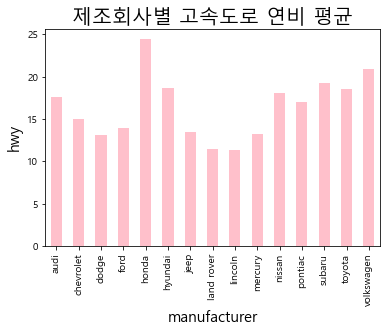

In [170]:
fig = plt.figure()

manu.plot(kind='bar', color='pink')
plt.title('제조회사별 고속도로 연비 평균', size=20) 
plt.xlabel('manufacturer', size=15)
plt.ylabel('hwy', size=15)

plt.show()
plt.close()

### 문제 04]
- 우리가 만든 연료 가격 프레임을 원본 프레임에 병합

In [171]:
types = [(carDF['fl'] == 'c'),
         (carDF['fl'] == 'd'),
         (carDF['fl'] == 'e'),
         (carDF['fl'] == 'p'),
         (carDF['fl'] == 'r')] 

price = [2.35,2.38,2.11,2.76,2.22]

In [172]:
carDF['price_fl'] = np.select(types, price)
carDF

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,2.76
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,2.76
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,2.76
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,2.76


### 문제 05]
- 머지한 데이터 프레임에서 model, fl, price_fl 만 추출(필터링)
- 데이터 전처리 과정에서 결측값 확인하기

In [173]:
result_05 = carDF.filter(('model', 'fl', 'price_fl'))
result_05

,model,fl,price_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76
...,...,...,...
229,passat,p,2.76
230,passat,p,2.76
231,passat,p,2.76
232,passat,p,2.76


In [174]:
result_05.isna().sum()

model       0
fl          0
price_fl    0
dtype: int64

### 문제 06]
- 구동방식(drv) 별 고속도로 연비(hwy)평균
- 임의적으로 결측값 처리를 위해서 더미 값을 넣어보도록 하자
- 데이터 전처리 과정에서 결측값 확인하기

In [176]:
carDF.groupby('drv').mean()['hwy']

drv
4    19.174757
f    28.160377
r    21.000000
Name: hwy, dtype: float64

In [177]:
carDF.fillna(method='ffill')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,2.76
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,2.76
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,2.76
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,2.76


In [178]:
carDF.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
price_fl        0
dtype: int64

### 문제 07]
- hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자
- bar plot 시각화

In [179]:
carDF['hwy'].isna().sum()

0

In [180]:
result_07 = carDF.groupby('drv').mean()['hwy']
result_07

drv
4    19.174757
f    28.160377
r    21.000000
Name: hwy, dtype: float64

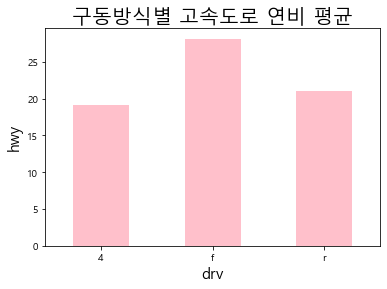

In [181]:
fig = plt.figure()

result_07.plot(kind='bar', color='pink', rot=False)
plt.title('구동방식별 고속도로 연비 평균', size=20) 
plt.xlabel('drv', size=15)
plt.ylabel('hwy', size=15)

plt.show()
plt.close()

### 문제 08]
- 위에서 했던 방식과 동일하게 구동방식별 고속도로, 도시연비의 평균을 구해보고
- 이를 데이터 프레임으로 만들어서 막대바로 시각화 해 보자
- hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자

In [182]:
carDF.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
price_fl        0
dtype: int64

In [183]:
result_08 = carDF.groupby('drv').mean()[['hwy', 'cty']]
result_08

,hwy,cty
drv,,
4,19.174757,14.330097
f,28.160377,19.971698
r,21.000000,14.080000


<Figure size 432x288 with 0 Axes>

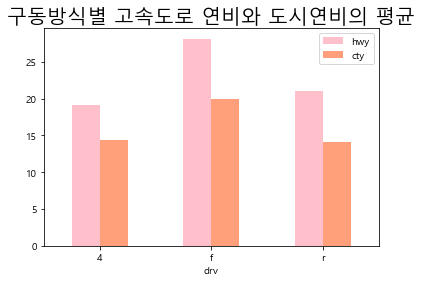

In [184]:
fig = plt.figure()

result_08.plot(kind='bar', rot=False, color=['pink', 'lightsalmon'])
plt.title('구동방식별 고속도로 연비와 도시연비의 평균', size=20) 

plt.show()
plt.close()

### 문제 09]
- 자동차(class)중에서 어떤 자동차가 가장 많은지 알아보려고 한다.
- 종류별 빈도를 막대바로 시각화 해보자
- 값의 종류별 빈도수 검사

In [185]:
result_09 = carDF.groupby('class').size()
result_09

class
2seater        5
compact       47
midsize       41
minivan       11
pickup        33
subcompact    35
suv           62
dtype: int64

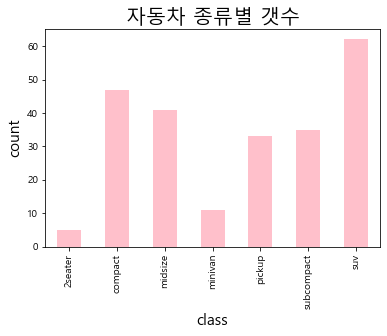

In [195]:
fig = plt.figure()

result_09.plot(kind='bar', color='pink')
plt.title('자동차 종류별 갯수', size=20) 

plt.xlabel('class', size=15)
plt.ylabel('count', size=15)

plt.show()
plt.close()

### 문제 10]
- 어떤 회사에서 생산한 suv 차종의 도시 연비가 높은지를 알아보려고 한다
- suv 차종을 대상으로 평균 도시연비가 가장 높은 회사 다섯곳을 막대 바로 시각화 해 보자
- bar plot 시각화

In [192]:
suv = carDF[carDF['class']=='suv'].groupby('manufacturer').mean()['cty']
result_10 = suv.sort_values(ascending=False).head()
result_10

manufacturer
subaru     18.833333
toyota     14.375000
nissan     13.750000
jeep       13.500000
mercury    13.250000
Name: cty, dtype: float64

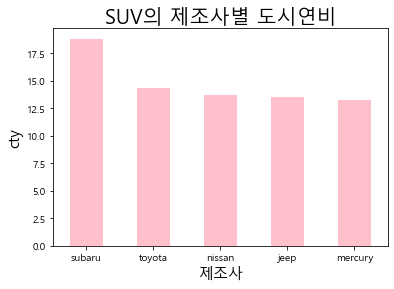

In [196]:
fig = plt.figure()

result_10.plot(kind='bar', rot=False, color='pink')
plt.title('SUV의 제조사별 도시연비', size=20) 

plt.xlabel('제조사', size=15)
plt.ylabel('cty', size=15)

plt.show()
plt.close()